In [281]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [866]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline


In [867]:
class Discrete_Doucet_system:
    
    dflt_theta = np.array([0, 1./2., 25., 6., 0.2])
    dflt_sigma= np.array([np.sqrt(10), np.sqrt(2)]) 
    def __init__(self, theta = dflt_theta,  sigma=dflt_sigma ):
        self.theta = theta
        self.sigma =sigma 
     
    def update(self, xdat):
        sys_noise =  np.random.normal(0., self.sigma[0], len(xdat))
        obs_noise = np.random.normal(0., self.sigma[1], len(xdat))
        xdat_new =  np.sum(self.fxdat(xdat), 0 )+ sys_noise        
        ydat_new = xdat_new + obs_noise
        return np.array(xdat_new)[0], np.array(ydat_new)[0]
     
    def fxdat(self, xdat):             
        fx = np.matrix([[self.theta[0]]*len(xdat) , self.theta[1]*xdat , self.theta[2]*(xdat / (1. + np.power(xdat,2)) ), \
        self.theta[3]*np.cos(self.theta[4]*xdat)])
        return  fx       
    
    def jacob(self, xdat, sine = True):
        
        if sine == True:
            jacobian =  np.matrix([[1.]*len(xdat),  xdat, (xdat / (1. + np.power(xdat,2)) ), \
                     np.cos(self.theta[4]*xdat), -xdat * self.theta[3] *np.sin(self.theta[4]*xdat) ])
        else:
            jacobian =  np.matrix([[1.]*len(xdat),  xdat, (xdat / (1. + np.power(xdat,2)) ), \
                     np.cos(self.theta[4]*xdat)])
        
        return jacobian
    


In [868]:
dsystem = Discrete_Doucet_system()
dsystem.theta, dsystem.sigma

(array([  0. ,   0.5,  25. ,   6. ,   0.2]), array([ 3.16227766,  1.41421356]))

In [869]:
init = -1.5
Nx = 30
Ny = 60

x0 = np.array([init]*Nx )
x0 = np.random.normal(init,  np.sqrt(5) , Nx)



In [870]:
T = 12
xnow = x0
xmean = np.array([0.]*(T+1))
xmean[0] = init

for t  in range(1,T+1,1):
    xynow = dsystem.update(xnow)
    xnow = xynow[0]
    ynow = xynow[1]
    xmean[t] = np.mean(xnow)

xdat = xnow    

In [871]:
x0 = np.random.normal(init,  np.sqrt(5) , Ny)
xnow = x0
xmean = np.array([0.]*(T+1))
xmean[0] = init
for t  in range(1,T+1,1):
    xynow = dsystem.update(xnow)
    xnow = xynow[0]
    ynow = xynow[1]
    xmean[t] = np.mean(xnow)

xobs = xnow

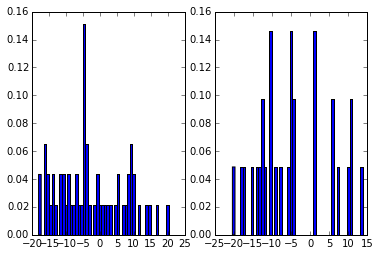

In [872]:
plt.subplot(1,2,0)
xplot= plt.hist(xdat,bins=50, normed=True)
plt.subplot(1,2,1)
yplot= plt.hist(xobs,bins=50, normed=True)


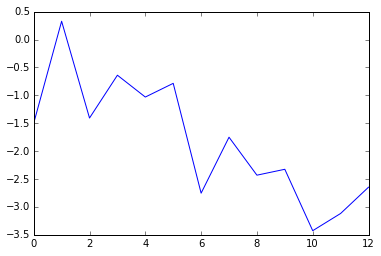

In [873]:
plt.plot(range(0,T+1,1), xmean)

In [874]:
hoge = dsystem.jacob(xnow, False)
hoge.shape

(4, 60)

In [861]:
xdatmat = np.matrix([list(xdat)] * Ny)
xobsmat = np.matrix([list(xobs)] * Nx)
xdatmat.shape, xobsmat.shape

((60, 30), (30, 60))

In [862]:
diff = np.abs(xdatmat -np.transpose(xobsmat))
diffsqr = np.power(diff, 2)
pyx = np.exp(-(diffsqr  - np.transpose(np.matrix([[np.min(row) for row in diffsqr]]*Nx))))
pyxm = np.matrix([row/np.sum(row) for row in pyx.tolist()])
px_new = np.array(np.sum(pyxm, 0))[0] 
px_new = px_new / sum(px_new)

In [863]:
Nx_resample = 500000
sample = np.random.multinomial(Nx_resample, px_new)

In [864]:
np.mean(px_new), np.var(px_new), np.mean(sample), np.var(sample), sum(sample)

(0.033333333333333333,
 0.00088119340622938005,
 16666.666666666668,
 218784484.35555553,
 500000)

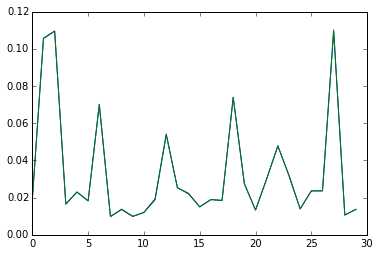

In [865]:
plt.plot(range(0, Nx,1),np.double(sample)/Nx_resample)
plt.plot(range(0, Nx,1),px_new)